In [1]:
import numpy as np
import torch

import deepinv as dinv
from deepinv.utils.plotting import plot
from deepinv.optim.data_fidelity import L2
from deepinv.utils.demo import load_url_image, get_image_url
from tqdm import tqdm  # to visualize progress

from PMCPnP import PMCPnPAnnealing, PMCPnP
from PMCPnP import PMCPnPIterator, PMCPnPAnnealingIterator
from utils import get_blur_physics, get_inpainting_physics

device = dinv.utils.get_freer_gpu() if torch.cuda.is_available() else "cpu"

url = get_image_url("butterfly.png")
img_size = 256
x_true = load_url_image(url=url, img_size=img_size).to(device)
x = x_true.clone()

/Data/jaybee/miniconda3/envs/altegrad/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Data/jaybee/miniconda3/envs/altegrad/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Selected GPU 0 with 24128 MB free memory 


/Data/jaybee/miniconda3/envs/altegrad/lib/python3.11/site-packages/deepinv/physics/blur.py:264: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  y[i, j, :, :] = F.conv2d(


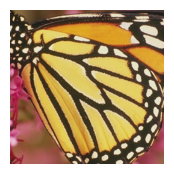

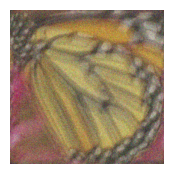

In [2]:
sigma = 0.1  # noise level

physics = get_blur_physics(sigma, device)

#physics = get_inpainting_physics(img_size, sigma, device)

torch.manual_seed(0)

# load Gaussian Likelihood
likelihood = dinv.optim.L2(sigma=sigma)

prior = dinv.optim.ScorePrior(
    denoiser=dinv.models.DnCNN(pretrained="download_lipschitz")
    #denoiser=dinv.models.DiffUNet(large_model=False)
).to(device)

y = physics(x)
plot(x_true.detach().cpu())
plot(y)

In [3]:
gamma = 1e-5
alpha = 1
iterations = int(2e3) if torch.cuda.is_available() else 10
sigma_denoiser = np.sqrt(2 * gamma) * 2
print(sigma_denoiser)


pmc_pnp = PMCPnP(prior=prior,
                 data_fidelity=likelihood,
                 max_iter=iterations,
                 gamma=gamma,
                 sigma=sigma_denoiser,
                 alpha=alpha,)




0.00894427190999916


  1%|          | 15/2000 [00:00<00:13, 148.85it/s]

100%|██████████| 2000/2000 [00:17<00:00, 115.39it/s]


Monte Carlo sampling finished! elapsed time=17.39 seconds
Iteration 1999, current converge crit. = 3.83E-05, objective = 1.00E-03 
Linear reconstruction PSNR: 14.75 dB
PreconULA posterior mean PSNR: 15.37 dB


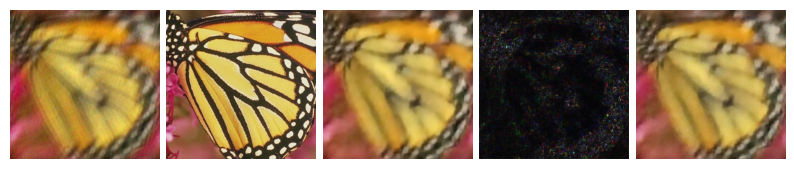

In [4]:

pula_mean, pula_var = pmc_pnp(y, physics)

# compute linear inverse
x_lin = physics.A_adjoint(y)

# compute PSNR
print(f"Linear reconstruction PSNR: {dinv.utils.metric.cal_psnr(x, x_lin):.2f} dB")
print(
    f"PreconULA posterior mean PSNR: {dinv.utils.metric.cal_psnr(x, pula_mean):.2f} dB"
)

example_sample = pula_mean + torch.randn_like(pula_mean) * torch.sqrt(pula_var)


# plot results
imgs = [x_lin, x, pula_mean, pula_var, example_sample]
plot(imgs)

In [5]:
iterations = int(3e3) if torch.cuda.is_available() else 10
gamma = 0.000_01

xsi = 0.99

base_sigma = np.sqrt(2 * gamma) * 10
min_sigma = np.sqrt(2 * gamma)
print(base_sigma, min_sigma)
base_alpha = 1 / (min_sigma**2)
min_alpha = 1
sigmas = torch.Tensor([max(base_sigma * (xsi**i) , min_sigma) for i in range(iterations)])
alphas = torch.Tensor([max(base_alpha * (elem**2), min_alpha) for elem in sigmas]) / 255


pmc_pnp = PMCPnPAnnealing(prior=prior,
                 data_fidelity=likelihood,
                 max_iter=iterations,
                 gamma=gamma,
                 sigmas=sigmas,
                 alphas=alphas,)




0.0447213595499958 0.00447213595499958


100%|██████████| 3000/3000 [00:26<00:00, 114.56it/s]


Monte Carlo sampling finished! elapsed time=26.24 seconds
Iteration 2999, current converge crit. = 1.14E-04, objective = 1.00E-03 
Linear reconstruction PSNR: 14.75 dB
PreconULA posterior mean PSNR: 12.51 dB


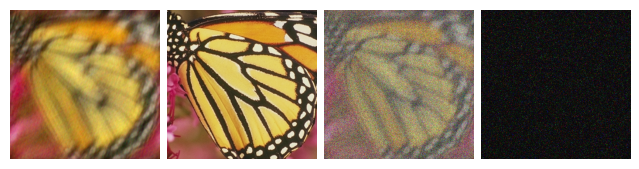

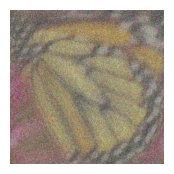

In [6]:

pula_mean, pula_var = pmc_pnp(y, physics)

# compute linear inverse
x_lin = physics.A_adjoint(y)

# compute PSNR
print(f"Linear reconstruction PSNR: {dinv.utils.metric.cal_psnr(x, x_lin):.2f} dB")
print(
    f"PreconULA posterior mean PSNR: {dinv.utils.metric.cal_psnr(x, pula_mean):.2f} dB"
)

# plot results
imgs = [x_lin, x, pula_mean, pula_var]
plot(imgs)
example_sample = pula_mean + torch.randn_like(pula_mean) * torch.sqrt(pula_var)

plot(example_sample)


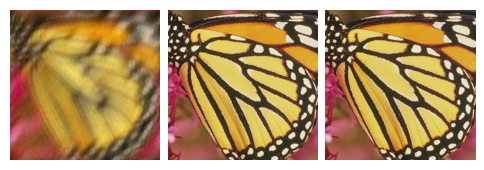

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp1805nw67 a7e023917e5ec54c63f748b782850717.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./a7e023917e5ec54c63f748b782850717.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp1805nw67/a7e023917e5ec54c63f748b782850717.log.




<Figure size 1800x400 with 3 Axes>

In [9]:
iterator = PMCPnPIterator(gamma=gamma, sigma=sigma_denoiser, alpha=alpha)

class PMCOptim(dinv.optim.OptimIterator):
    def __init__(self, iterator):
        super().__init__()
        self.iterator = iterator
        self.has_cost = True
        self.g_first = False
    
    def forward(self, X, cur_data_fidelity, cur_prior, cur_params, y, physics):
        x, z = X['est']
        x_est = self.iterator(x, y, physics, cur_data_fidelity, cur_prior)
        cost = cur_data_fidelity(x_est, y, physics)
        score = cur_prior(x_est, sigma_denoiser)
        return {'est': (x, 0), 'cost': cost}

model = dinv.optim.optim_builder(
    iteration=PMCOptim(iterator),
    prior=prior,
    data_fidelity=likelihood,
    max_iter=5e3,
    verbose=True,
)

x_model, metrics = model(y, physics, x_gt=x_true, compute_metrics=True)

dinv.utils.plotting.plot([x_model, x, x_true])
#dinv.utils.plotting.plot_curves(metrics)


In [22]:
import matplotlib.pyplot as plt
import matplotlib_inline
plt.plot(np.array(metrics['psnr'][0]))
plt.show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpxuirp9qp a7e023917e5ec54c63f748b782850717.tex

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./a7e023917e5ec54c63f748b782850717.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpxuirp9qp/a7e023917e5ec54c63f748b782850717.log.




<Figure size 640x480 with 1 Axes>

# test

In [189]:
denoiser = dinv.models.DRUNet(pretrained="download")
denoiser = dinv.models.DiffUNet(pretrained='download', large_model=False)

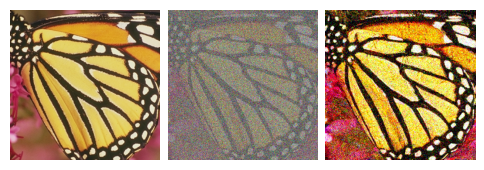

In [193]:
noise = dinv.physics.GaussianNoise(sigma=0.5)

y = noise(x)

out = denoiser.forward_denoise(y.cpu(), 0.5)

plot([x, y, out])